In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as sklm
import xgboost as xgb
import random as nr

C:\Users\NESTO TECH\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
import seaborn as sns
import scipy.stats as ss
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    


In [2]:
Features = pd.read_csv('train.csv')
Labels = pd.read_csv('regression_labels.csv')
new_test = pd.read_csv('test.csv')

In [4]:
Labels.shape, Features.shape

((16404, 1), (16404, 15))

In [3]:
x_train, x_test, y_train, y_test = ms.train_test_split(Features, Labels, test_size = 0.30, random_state = 1234)

In [1]:
nr.seed(54648)
inside = ms.KFold(n_splits=5, shuffle=True)
nr.seed(353234)
outside = ms.KFold(n_splits = 5, shuffle = True)
params = {'learning_rate': [0.1, 0.01, 0.001, 0.0001],
         'max_depth': [ 5,  7,  9, 11, 13, 15],
         'subsample':  [0.6,0.7,0.75,0.8,0.85,0.9]}
rf_xgb = xgb.XGBRegressor(n_estimators= 15, n_jobs=2)
rf_xgb = ms.GridSearchCV(estimator=rf_xgb, param_grid= params, scoring='r2', return_train_score=True)

In [13]:
rf_xgb.fit(Features, Labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=15,
       n_jobs=2, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001], 'max_depth': [5, 7, 9, 11, 13, 15], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [45]:
print(rf_xgb.best_estimator_.max_depth),print(rf_xgb.best_estimator_.learning_rate),\
print(rf_xgb.best_estimator_.subsample)

7
0.1
0.9


(None, None, None)

In [2]:
nr.seed(498)
cv_estimate = ms.cross_val_score(rf_xgb, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.985
SDT of the metric       = 0.000
Outcomes by cv fold
Fold  1    0.986
Fold  2    0.985
Fold  3    0.985
Fold  4    0.985
Fold  5    0.985

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=rf_xgb.best_estimator_.max_depth,learning_rate= rf_xgb.best_estimator_.learning_rate,
                            subsample= rf_xgb.best_estimator_.subsample, n_estimator = 15, n_jobs = 2 )

In [19]:
model_xgb.fit(x_train, y_train)
prediction = model_xgb.predict(x_test)

Mean Square Error      = 10.121951681499018
Root Mean Square Error = 3.1815014822405816
Mean Absolute Error    = 2.527128066923598
Median Absolute Error  = 2.1228675842285156
R^2                    = 0.9862001520898219
Adjusted R^2           = 0.9861183459595285


C:\Users\NESTO TECH\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


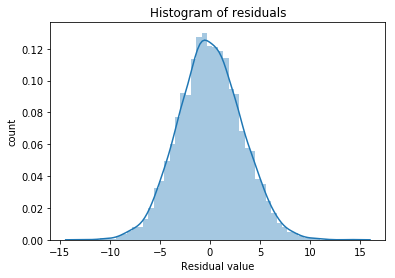

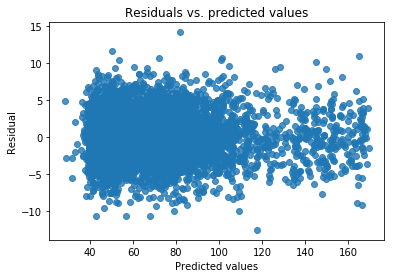

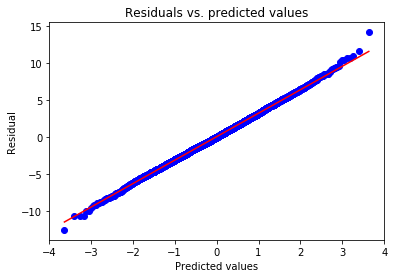

In [9]:
y_tests = np.array(y_test)
print_metrics( y_tests, prediction, 30)
hist_resids(y_tests, prediction)
resid_plot(y_tests, prediction)
resid_qq(y_tests, prediction)

In [20]:
new_prediction = model_xgb.predict(new_test)

In [21]:
validationData = pd.DataFrame({'validation_data': prediction})
testData = pd.DataFrame({'test_data': new_prediction})

In [22]:
validationData.to_csv('validationData_XGB.csv', index=False)
testData.to_csv('testData_XGB.csv', index = False)